In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib widget

In [122]:
test_name = "bsanity/insanity"

In [123]:
# Load all the final snapshots

snapshot_filenames = os.listdir(f"../../data_tests/{test_name}/snapshots")
snapshot_filenames.sort()
temp = np.empty(len(snapshot_filenames))
for i, filename in enumerate(snapshot_filenames):
    temp[i] = float(filename[1:-4])
    snapshot = np.load(f"../../data_tests/{test_name}/snapshots/{filename}")
    if i == 0:
        snapshots = np.empty((len(snapshot_filenames), *snapshot.shape))
    snapshots[i] = snapshot
# Temp / analytic T_c
normt = temp / 2.269
print(f"Test: {test_name}, got {len(snapshot_filenames)} files for {temp[0]:.2f} <= T <= {temp[-1]:.2f}")

Test: bsanity/insanity, got 500 files for 0.00 <= T <= 4.99


In [124]:
# Get autocorrelation data from the simulation results

version = 0 # Should always be zero since I'm not putting them in the same folder
sc = pd.read_csv(f"../data_tests/{test_name}/result/0.00T5.00_SC_v{version}.csv", skiprows=3)
sc_data = np.empty((len(temp), len(sc.columns) - 2))

for idx, col_name in enumerate(sc.columns[1:-1]):
    sc_data[:, idx] = sc[col_name]
    
print(f"Test: {test_name}, autocorrelation data has shape {sc_data.shape}")

Test: bsanity/insanity, autocorrelation data has shape (500, 49)


In [125]:
def get_autocorrelation(idx):
    """Exact function from c++ translated into python"""
    snapshot = snapshots[idx]
    col_mean = snapshot.mean(axis=0)
    row_mean = snapshot.mean(axis=1)

    def get_spin(row, col):
        return snapshot[row, col]
    N = snapshots[0].shape[0]
    
    autocorrelation = np.empty(N//2)

    for k in range(0, N//2):
        spin_sum = 0.0
        n_entries = 0
        for j in range(1, N):
            for i in range(0, N):
                t = (j + k) % N
                spin_sum += (get_spin(j, i) - col_mean[i])*(get_spin(t, i) - col_mean[i])
                spin_sum += (get_spin(i, j) - row_mean[i])*(get_spin(i, t) - row_mean[i])
                n_entries += 1
    
        spin_sum /= 2 * n_entries
        
        autocorrelation[k] = spin_sum
    return autocorrelation
        

In [126]:
# Set a temperature index for display and precompute some things for the next cell

idx = min(temp.searchsorted(0.3), len(temp) - 1)
extern_autocor = sc_data[idx]
#autocor = get_autocorrelation(idx)
autocor = np.zeros(1 + len(extern_autocor)) # Skip the computation if we don't care
print(f"extern_autocor.shape = {extern_autocor.shape}, autocor.shape = {autocor.shape}")

extern_autocor.shape = (49,), autocor.shape = (50,)


T = 0.30 J = 0.13 T_c
-0.7546 ± 0.6562
Maximum deviation between two autocorrelation fn's = 0.001617981120944
0.0


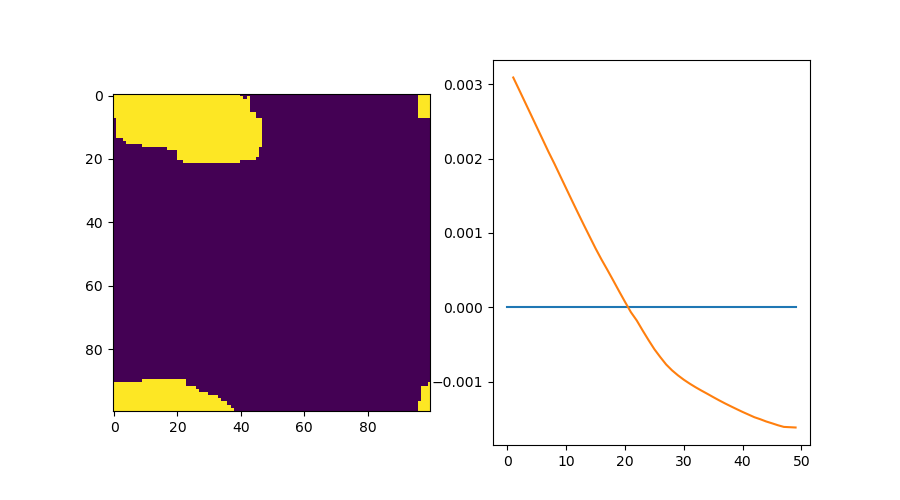

In [127]:
plt.close()
print(f"T = {temp[idx]:.2f} J = {normt[idx]:.2f} T_c")
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(9, 5))
im = ax.imshow(snapshots[idx])
cor_x = np.arange(len(autocor))
ax2.plot(cor_x, autocor, label="mine")
ax2.plot(cor_x[1:], extern_autocor, label="external")
ax2.legend
print(f"{snapshots[idx].mean()} ± {snapshots[idx].std():.4f}")
print(f"Maximum deviation between two autocorrelation fn's = {max(autocor[1:] - extern_autocor)}")
#fig.colorbar(im)
print(autocor[0]**0.5)

In [113]:
plt.close()

In [144]:
arr = np.array([
    [1, 2, 3],
    [0, 0, 0]
])
print(arr.mean(axis=0), arr.mean(axis=1))

[0.5 1.  1.5] [2. 0.]
